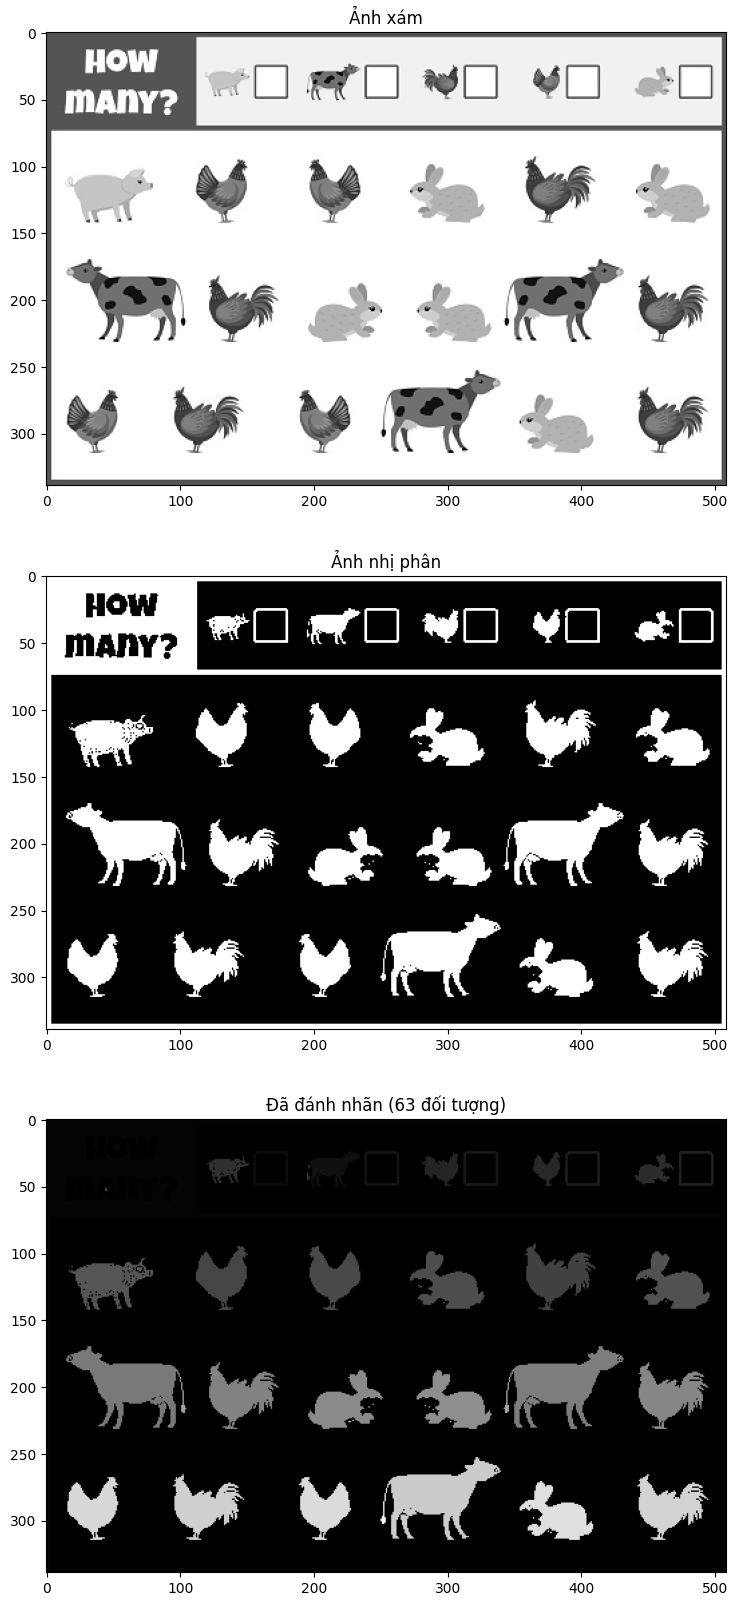

In [7]:
# Hinh thai hoc (Morphology)
# Erosion: thu nho kich thuoc cua doi tuong trong anh
# Dilation: Mo rong kich thuoc cua doi tuong trong anh
# Opening: Thuc hien erosion sau do dilation giup loai bo nhieu va noi cac doi tuong
# Closing: Thuc hien dilation sau do erosion giup loai bo nhieu va lap day lo
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

# Đọc ảnh
image_path = 'D:/Python/computervision/image/01/animal.jpg'
image = Image.open(image_path)

# Chuyển sang ảnh xám
gray_image = image.convert('L')

image_array = np.array(gray_image)

# Chuyển sang ảnh nhị phân (<200 set to 1 (white) opposite set to 0(black))
binary_image = 1*(image_array<200)

# Đánh nhãn
labeled_image, num_features = ndimage.label(binary_image)

# Tạo lưới subplot với 3 dòng và 1 cột
fig, axs = plt.subplots(3, 1, figsize=(20, 20))

plt.subplot(3,1,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Ảnh xám")

plt.subplot(3,1,2)
plt.imshow(binary_image, cmap='gray')
plt.title("Ảnh nhị phân")

plt.subplot(3,1,3)
plt.imshow(labeled_image, cmap='gray')
plt.title(f"Đã đánh nhãn ({num_features} đối tượng)")

plt.show()

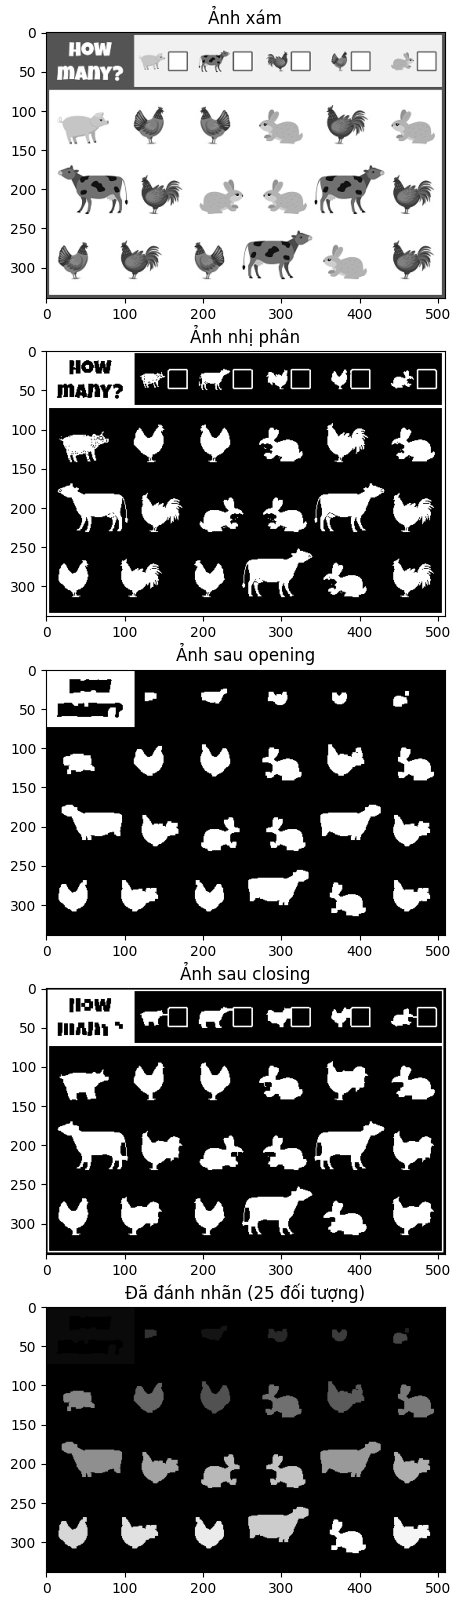

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

# Đọc ảnh
image_path = 'D:/Python/computervision/image/01/animal.jpg'
image = Image.open(image_path)

# Chuyển sang ảnh xám
gray_image = image.convert('L')

image_array = np.array(gray_image)

# Chuyển sang ảnh nhị phân
binary_image = 1*(image_array<200)

# Thực hiện opening để loại bỏ nhiễu và nối các đối tượng 
opened_image = ndimage.binary_opening(binary_image, structure=np.ones((5,5))) # Truot ma tran 5*5
closed_image = ndimage.binary_closing(binary_image, structure=np.ones((5,5)))

# Đánh nhãn
labeled_image, num_features = ndimage.label(opened_image)

# Tạo lưới subplot với 3 dòng và 1 cột
fig, axs = plt.subplots(5, 1, figsize=(20, 20))

plt.subplot(5,1,1)
plt.imshow(gray_image, cmap='gray')
plt.title("Ảnh xám")

plt.subplot(5,1,2)
plt.imshow(binary_image, cmap='gray')
plt.title("Ảnh nhị phân")
                                      
plt.subplot(5,1,3)
plt.imshow(opened_image, cmap='gray')
plt.title("Ảnh sau opening")

plt.subplot(5,1,4)
plt.imshow(closed_image, cmap='gray')
plt.title("Ảnh sau closing")

plt.subplot(5,1,5)
plt.imshow(labeled_image, cmap='gray')
plt.title(f"Đã đánh nhãn ({num_features} đối tượng)")

plt.show()